# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Ученая степень', 'Неоконченное высшее', 'Среднее', 'Неполное среднее', 'Высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'Государственная служба', 'Подбор персонала', 'Банк/Финансы', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Туризм', 'Здравоохранение', 'Развлечения/Искусство', 'Информационные технологии', 'Наука', 'Транспорт', 'Торговля', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Сборочные производства', 'Юридические услуги/нотариальные услуги', 'Строительство', 'Энергетика', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
def getColumnsWithEmptyData(dataFrame):
    res=[]
    for c in dataFrame.columns:    
        nullCount=len(dataFrame[dataFrame[c].isnull()])
        if nullCount>0:
           res.append([c, nullCount, dataFrame[c].dtype])
    return res
getColumnsWithEmptyData(df)

[['GEN_INDUSTRY', 2713, dtype('O')],
 ['GEN_TITLE', 2713, dtype('O')],
 ['ORG_TP_STATE', 2713, dtype('O')],
 ['ORG_TP_FCAPITAL', 2708, dtype('O')],
 ['JOB_DIR', 2713, dtype('O')],
 ['TP_PROVINCE', 590, dtype('O')],
 ['REGION_NM', 2, dtype('O')],
 ['WORK_TIME', 2717, dtype('float64')],
 ['PREVIOUS_CARD_NUM_UTILIZED', 29533, dtype('float64')]]

Пропуски есть, их можно заменить на медиану, тогда эти данные будут "нейтральными" и не будут сильно влиять на результат да и с категориальными признаками будет проще(после кодирования), чем, к примеру, если их заменить на среднее.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
def getCategoryColumns(dataFrame,descDataFrame):
    res=[]
    for c in dataFrame.columns:            
        values=dataFrame[c].unique()
        count=len(values)
        if count<100 and not(count==2 and 0 in values and 1 in values):
            desc=descDataFrame[descDataFrame["ПОЛЕ"]==c].values
            if len(desc)>0:
                res.append([c,values,desc[0][1]])
            else:
                res.append([c,values,""])        
    return res
getCategoryColumns(df,df_descr)

[['AGE',
  array([30, 48, 35, 22, 27, 44, 57, 33, 53, 40, 59, 39, 23, 28, 55, 34, 51,
         65, 46, 47, 63, 54, 52, 56, 29, 36, 50, 49, 42, 62, 31, 61, 43, 32,
         37, 58, 45, 24, 26, 66, 41, 25, 38, 64, 60, 21, 67], dtype=int64),
  'возраст клиента'],
 ['CHILD_TOTAL',
  array([ 1,  0,  2,  3,  4,  5,  6,  7,  8, 10], dtype=int64),
  'количество детей клиента'],
 ['DEPENDANTS',
  array([1, 0, 2, 3, 4, 5, 7, 6], dtype=int64),
  'количество иждивенцев клиента'],
 ['EDUCATION',
  array(['Среднее специальное', 'Среднее', 'Высшее', 'Неполное среднее',
         'Неоконченное высшее', 'Два и более высших образования',
         'Ученая степень'], dtype=object),
  'образование'],
 ['MARITAL_STATUS',
  array(['Не состоял в браке', 'Состою в браке', 'Разведен(а)',
         'Вдовец/Вдова', 'Гражданский брак'], dtype=object),
  'семейное положение'],
 ['GEN_INDUSTRY',
  array(['Образование', nan, 'Металлургия/Промышленность/Машиностроение',
         'Другие сферы', 'Сборочные производства',

Категориальные признаки есть. Отбросим те, которые уже заполненны 0 и 1 и явно колличественные(типа CHILD_TOTAL), а к остальным применим get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
categoryColumn=["EDUCATION", "MARITAL_STATUS", "GEN_TITLE", "ORG_TP_STATE", "ORG_TP_FCAPITAL", "JOB_DIR", 
                "FAMILY_INCOME", "REG_ADDRESS_PROVINCE", "FACT_ADDRESS_PROVINCE", "POSTAL_ADDRESS_PROVINCE", "TP_PROVINCE",
                "REGION_NM", "GEN_INDUSTRY"]

def comaReplace(dataFrame,colNameList):
    for colName in colNameList:
        dataFrame[colName]= dataFrame[colName].map(lambda x: x.replace(',', '.')).astype('float') 

def fillNull(dataFrameSource):
    dataFrame = dataFrameSource.copy()
    for c in dataFrame.columns:            
        nullCount=len(dataFrame[dataFrame[c].isnull()])
        if nullCount>0:
           dataFrame[c] = dataFrame[c].fillna(dataFrame[c].median())
    return dataFrame
        
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    df_output=df_output.drop('AGREEMENT_RK', axis=1)
    
    comaReplace(df_output,["PERSONAL_INCOME", "CREDIT", "FST_PAYMENT", "LOAN_AVG_DLQ_AMT", "LOAN_MAX_DLQ_AMT"])            
    
    df_output=pd.get_dummies(df_output,columns=categoryColumn,drop_first=False)
        
    df_output=fillNull(df_output)
                       
    return df_output
df.pipe(preproc_data)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,GEN_INDUSTRY_Страхование,GEN_INDUSTRY_Строительство,GEN_INDUSTRY_Торговля,GEN_INDUSTRY_Транспорт,GEN_INDUSTRY_Туризм,GEN_INDUSTRY_Управляющая компания,GEN_INDUSTRY_Химия/Парфюмерия/Фармацевтика,GEN_INDUSTRY_ЧОП/Детективная д-ть,GEN_INDUSTRY_Энергетика,GEN_INDUSTRY_Юридические услуги/нотариальные услуги
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,44,0,1,0,2,2,7000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,33,1,0,1,2,2,7500.0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0,53,0,1,1,2,0,9000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,33,1,0,0,1,0,4000.0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)



#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
target_col="TARGET"
y=df_train_preproc[target_col]
x=df_train_preproc.drop(target_col, axis=1)
y_test=df_test_preproc[target_col]
x_test=df_test_preproc.drop(target_col, axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train0, x_test0, y_train0, y_test0 = train_test_split(x, y, test_size=0.3, random_state=42)

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc=DecisionTreeClassifier()
dtc.fit(x_train0,y_train0)
predictDtc=dtc.predict(x_test0)
predictProbaDtc=dtc.predict_proba(x_test0)

rfc=RandomForestClassifier()
rfc.fit(x_train0,y_train0)
predictRfc=rfc.predict(x_test0)
predictProbaRfc=rfc.predict_proba(x_test0)


lr=LogisticRegression()
lr.fit(x_train0,y_train0)
predictLr=lr.predict(x_test0)
predictProbaLr=lr.predict_proba(x_test0)

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [22]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("--DecisionTreeClassifier--")
print("accuracy",accuracy_score(y_test0,predictDtc))
print("precision",precision_score(y_test0,predictDtc))
print("recall",recall_score(y_test0,predictDtc))

print("--RandomForestClassifier--")
print("accuracy",accuracy_score(y_test0,predictRfc))
print("precision",precision_score(y_test0,predictRfc))
print("recall",recall_score(y_test0,predictRfc))

print("--LogisticRegression--")
print("accuracy",accuracy_score(y_test0,predictLr))
print("precision",precision_score(y_test0,predictLr))
print("recall",recall_score(y_test0,predictLr))

--DecisionTreeClassifier--
accuracy 0.795927304576
precision 0.15157116451
recall 0.147747747748
--RandomForestClassifier--
accuracy 0.876505364572
precision 0.235294117647
recall 0.00720720720721
--LogisticRegression--
accuracy 0.878038099409
precision 0.333333333333
recall 0.0036036036036


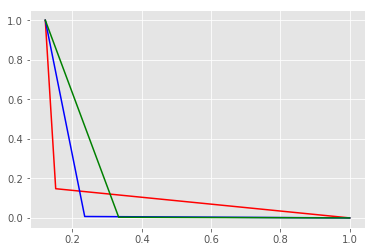

In [23]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
from sklearn.metrics import precision_recall_curve
precisionDtc, recallDtc, thresholdsDtc=precision_recall_curve(y_test0,predictDtc) 
precisionRfc, recallRfc, thresholdsRfc=precision_recall_curve(y_test0,predictRfc) 
precisionLr, recallLr, thresholdsLr=precision_recall_curve(y_test0,predictLr) 

%matplotlib inline
from matplotlib import pyplot as pl
pl.plot(precisionDtc,recallDtc,'r')
pl.plot(precisionRfc,recallRfc,'b')
pl.plot(precisionLr,recallLr,'g')

DecisionTreeClassifier(roc_auc):  0.516670484043
RandomForestClassifier(roc_auc):  0.501983464022
LogisticRegression(roc_auc):  0.501303297315


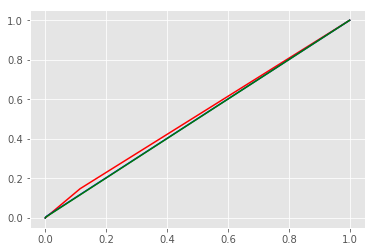

In [24]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_curve, roc_auc_score
fprDtc, tprDtc, tresholdsDtc=roc_curve(y_test0,predictDtc)
fprRfc, tprRfc, tresholdsRfc=roc_curve(y_test0,predictRfc)
fprLr, tprLr, tresholdsLr=roc_curve(y_test0,predictLr)
pl.plot(fprDtc, tprDtc,'r')
pl.plot(fprRfc, tprRfc,'b')
pl.plot(fprLr, tprLr,'g')
print("DecisionTreeClassifier(roc_auc): ",roc_auc_score(y_test0,predictDtc))
print("RandomForestClassifier(roc_auc): ",roc_auc_score(y_test0,predictRfc))
print("LogisticRegression(roc_auc): ",roc_auc_score(y_test0,predictLr))

In [25]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
rocAucDTC=cross_val_score(dtc,x_train0,y_train0,scoring='roc_auc',cv=10)
print("DecisionTreeClassifier(roc_auc):",rocAucDTC)
print("mean=",rocAucDTC.mean())
rocAucRFC=cross_val_score(rfc,x_train0,y_train0,scoring='roc_auc',cv=10)
print("RandomForestClassifier(roc_auc):",rocAucRFC)
print("mean=",rocAucRFC.mean())
rocAucLR=cross_val_score(lr,x_train0,y_train0,scoring='roc_auc',cv=10)
print("LogisticRegression(roc_auc):",rocAucLR)
print("mean=",rocAucLR.mean())

DecisionTreeClassifier(roc_auc): [ 0.5401638   0.56033435  0.507641    0.52322695  0.52613137  0.55554711
  0.53914218  0.54068085  0.526       0.54329712]
mean= 0.536216473689
RandomForestClassifier(roc_auc): [ 0.61126731  0.56854948  0.59311466  0.5889311   0.6182413   0.58559608
  0.56979905  0.56788085  0.62917872  0.54763365]
mean= 0.588019221412
LogisticRegression(roc_auc): [ 0.66870145  0.6164978   0.62754981  0.61707194  0.61730834  0.60055724
  0.6281155   0.64920851  0.66682553  0.58902662]
mean= 0.628086276051


In [28]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
lr.fit(x,y)
lr.predict_proba(x_test)

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[ 0.84702966,  0.15297034],
       [ 0.94330062,  0.05669938],
       [ 0.81778012,  0.18221988],
       ..., 
       [ 0.81891128,  0.18108872],
       [ 0.94654073,  0.05345927],
       [ 0.82164933,  0.17835067]])

In [29]:
# Померить roc_auc на тесте
roc_auc_score(y_test,lr.predict(x_test))

0.49994376899696052